In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
!wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task


## Visualization utilities

In [1]:
#@markdown We implemented some functions to visualize the face landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision


def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())

  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

## Test detection results on test image

In [10]:
def show_detection_result(img_path):
    # STEP 2: Create an FaceLandmarker object.
    base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
    options = vision.FaceLandmarkerOptions(base_options=base_options,
                                        output_face_blendshapes=True,
                                        output_facial_transformation_matrixes=True,
                                        num_faces=1)
    detector = vision.FaceLandmarker.create_from_options(options)

    # STEP 3: Load the input image.
    image = mp.Image.create_from_file(img_path)

    # STEP 4: Detect face landmarks from the input image.
    detection_result = detector.detect(image)

    # STEP 5: Process the detection result. In this case, visualize it.
    annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
    plt.imshow(annotated_image)
    plt.show()

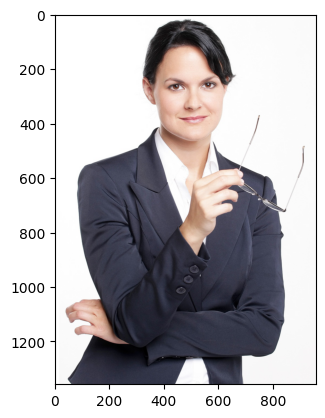

In [3]:
import cv2
import sys
import matplotlib.pyplot as plt   
    
img = cv2.imread("image.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

I0000 00:00:1702315989.759701  566573 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1702315989.805180  567528 gl_context.cc:344] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 545.23.08), renderer: NVIDIA GeForce RTX 2080/PCIe/SSE2
W0000 00:00:1702315989.805441  566573 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.


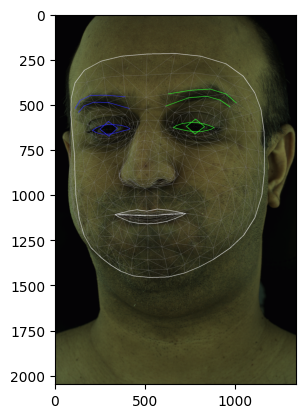

In [11]:
IMAGE_PATH = 'datasets/multiface/minidataset/m--20180227--0000--6795937--GHS/images/E057_Cheeks_Puffed/400016/021909.png'
show_detection_result(IMAGE_PATH)


I0000 00:00:1702316084.152357  566573 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1702316084.191175  567712 gl_context.cc:344] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 545.23.08), renderer: NVIDIA GeForce RTX 2080/PCIe/SSE2
W0000 00:00:1702316084.191442  566573 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.


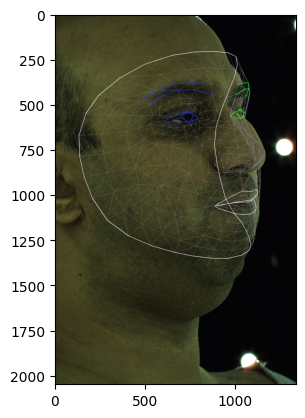

In [12]:
IMAGE_PATH = 'datasets/multiface/minidataset/m--20180227--0000--6795937--GHS/images/E057_Cheeks_Puffed/400018/021939.png'
show_detection_result(IMAGE_PATH)

I0000 00:00:1702316538.024365  566573 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1702316538.107239  568161 gl_context.cc:344] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 545.23.08), renderer: NVIDIA GeForce RTX 2080/PCIe/SSE2
W0000 00:00:1702316538.107512  566573 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.


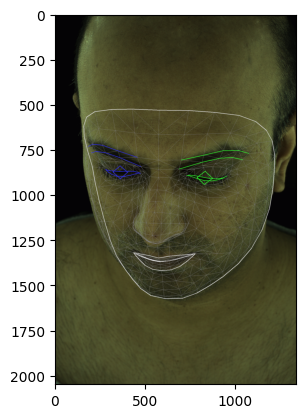

In [13]:
IMAGE_PATH = 'datasets/multiface/minidataset/m--20180227--0000--6795937--GHS/images/E057_Cheeks_Puffed/400041/022026.png'
show_detection_result(IMAGE_PATH)

I0000 00:00:1702317110.841258  566573 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1702317110.932396  568677 gl_context.cc:344] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 545.23.08), renderer: NVIDIA GeForce RTX 2080/PCIe/SSE2
W0000 00:00:1702317110.932699  566573 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.


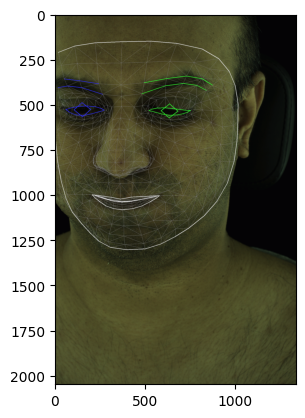

In [14]:
IMAGE_PATH = 'datasets/multiface/minidataset/m--20180227--0000--6795937--GHS/images/E057_Cheeks_Puffed/400002/021897.png'
show_detection_result(IMAGE_PATH)